<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido: FABIAN VILLADA

***
## Muestreo de señales - Fourier



<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
#bloque de funciones
def generador_senoidal (fs, f0, N, a0, p0 ):
    
    tt=np.arange( 0 , N/fs , step=1/fs)
    S = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, S

def generador_triangular (f0 , a0 , fs , N ):
    
    tt=np.arange( 0 , N/fs , step=1/fs)
    T = a0 * signal.sawtooth(2 * np.pi * f0 * tt)
    return tt ,T

def generador_cuadrada ( f0 , a0 , fs , N):
    tt=np.arange( 0 , N/fs , step=1/fs)
    C = a0 *signal.square(2 * np.pi * f0 *tt )
    return tt , C

def generador_ruido (media , sigma , fs , N):
    tt = np.arange(0.0, N/fs, 1/fs)
    R = np.random.normal(media, sigma, size = [N,1])
    return tt , R
  
def twildde_factor ( k , n , N):
    wk = np.cos( 2 * np.pi * k *n / N ) -  np.sin( 2 * np.pi * k * n / N )*1j
    return wk

def DFT ( signal , N  ):
    dft = np.arange(0.0 , N , dtype = 'complex' )
    for k in range (0 , N):
        sum_Wn = 0
        for n in range(0 , N):
            sum_Wn = sum_Wn + twildde_factor(k , n , N) * signal[n]
        dft[k] = sum_Wn
    
    return dft
    


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import fft
from pandas import DataFrame
from IPython.display import HTML

# Insertar aquí el código para inicializar tu notebook
########################################################


In [3]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz



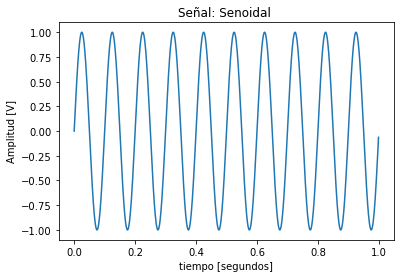

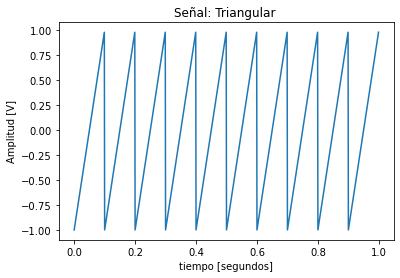

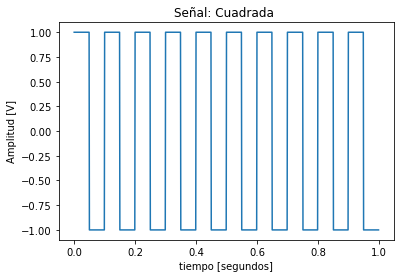

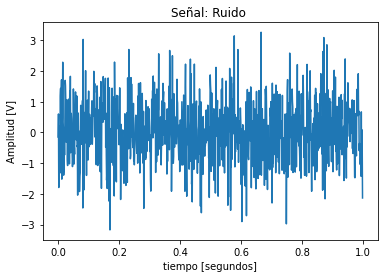

In [5]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

media = 0
sigma = 1

tt , S = generador_senoidal (fs , f0 , N , a0 , p0 )
#################
#Señal Triangular
#################
tt , T = generador_triangular( f0 , a0 , fs , N)
###############
#Señal Cuadrada
###############
tt , C = generador_cuadrada(f0 , a0 , fs , N)
################
# Señal ruido
###############
tt, R = generador_ruido (media , sigma , fs , N)


################
#VISUALIZO
###############
plt.figure(1)
plt.title('Señal: Senoidal ' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.plot(tt , S )

plt.figure(2)
plt.title('Señal: Triangular ' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.plot( tt , T)

plt.figure(3)
plt.title('Señal: Cuadrada ' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.plot( tt , C)

plt.figure(4)
plt.title('Señal: Ruido ' )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
plt.plot( tt , R)


¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


 <div class="alert alert-block alert-warning">
<b>Respuesta:</b> 10 picos en 1 seg. puedo ver en la figuara por lo tanto su f0 = 10Hz.
</div> 

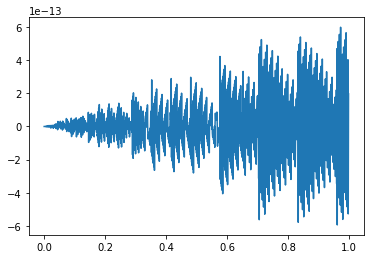

In [12]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt , S = generador_senoidal(fs , f0 , N , a0 , p0)
plt.plot(tt , S)

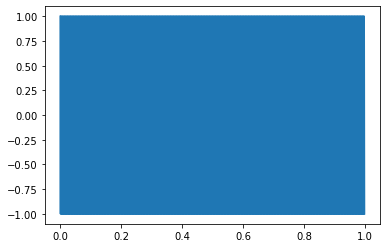

In [13]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt , S = generador_senoidal(fs , f0 , N , a0 , p0)
plt.plot(tt , S)

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> NO ES POSIBLE DIFERENCIARLAS. NO CUMPLO CON NYQUIST fs/fo ~ 1
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> ok.
</div>

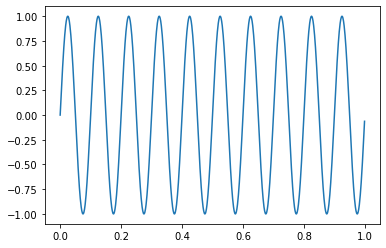

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs + 10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt , S = generador_senoidal(fs , f0 , N , a0 , p0)
plt.plot(tt , S)

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> NO ES POSIBLE DIFERENCIARLAS. NO CUMPLO CON NYQUIST fs/fo ~ 1.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> FILTRO PASA BAJOS A LA ENTRADA DE SEñAL ANALOGICA, ANTES DE MUESTREO.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>



<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

Text(0, 0.5, 'Fase')

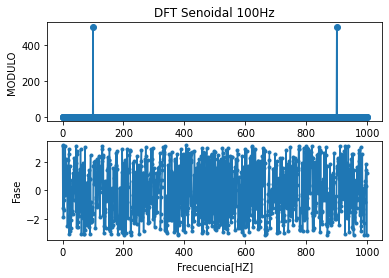

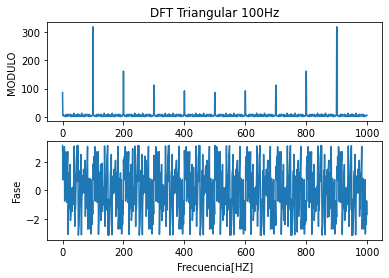

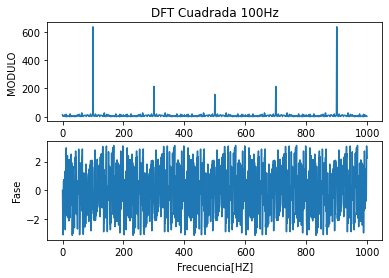

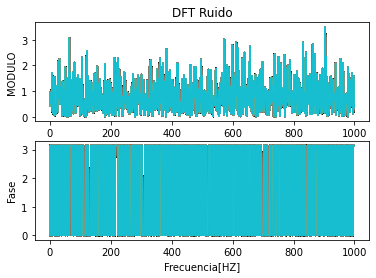

In [5]:
############
#2.a
############

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


def generador_senoidal (fs, f0, N, a0, p0 ):
    
    tt=np.arange( 0 , N/fs , step=1/fs)
    S = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, S

def generador_triangular (f0 , a0 , fs , N ):
    
    tt=np.arange( 0 , N/fs , step=1/fs)
    T = a0 * signal.sawtooth(2 * np.pi * f0 * tt)
    return tt ,T

def generador_cuadrada ( f0 , a0 , fs , N):
    tt=np.arange( 0 , N/fs , step=1/fs)
    C = a0 *signal.square(2 * np.pi * f0 *tt )
    return tt , C

def generador_ruido (media , sigma , fs , N):
    tt = np.arange(0.0, N/fs, 1/fs)
    R = np.random.normal(media, sigma, size = [N,1])
    return tt , R

    
    
##############################################################################


#############################################################################



N  = 1000             
fs = 1000
a0 = 1 # Volts
p0 = 0   #radianes. 
f0 = 100       # Hz  
media = 0
sigma = 1
df = fs/N


#freq = np.arange( 0 , fs  ) 
freq = np.linspace(0, (N-1)*df, N)   


tt , S = generador_senoidal (fs , f0 , N , a0 , p0 )
 
Sf = np.fft.fft(S , N)   #cALCULO LA FFT CON LA FUNCION DE LIB NUMPY fft.fft()
                         # Tambien esta la funcion de la lib SCIPY fft()
Sfabs = np.abs(Sf)
Sfangle = np.angle(Sf)

tt , T = generador_triangular( f0 , a0 , fs , N)
Tf = np.fft.fft(T , N)
Tabs = np.abs(Tf)
Tangle = np.angle(Tf)

tt , C = generador_cuadrada(f0 , a0 , fs , N)
Cf = np.fft.fft(C , N)
Cabs = np.abs(Cf)
Cangle = np.angle(Cf)

tt, R = generador_ruido (media , sigma , fs , N)
Rf = np.fft.fft(R , N)
Rabs = np.abs(Rf)
Rangle = np.angle(Rf)

###############################GRAFICOS####################################
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(freq, Sfabs , 'o-')
plt.title('DFT Senoidal 100Hz')
plt.ylabel('MODULO')
plt.subplot(2, 1, 2)
plt.plot(freq, Sfangle, '.-')
plt.xlabel('Frecuencia[HZ]')
plt.ylabel('Fase')

plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(freq, Tabs )
plt.title('DFT Triangular 100Hz')
plt.ylabel('MODULO')
plt.subplot(2, 1, 2)
plt.plot(freq, Tangle)
plt.xlabel('Frecuencia[HZ]')
plt.ylabel('Fase')

plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(freq, Cabs )
plt.title('DFT Cuadrada 100Hz')
plt.ylabel('MODULO')
plt.subplot(2, 1, 2)
plt.plot(freq, Cangle)
plt.xlabel('Frecuencia[HZ]')
plt.ylabel('Fase')

plt.figure(4)
plt.subplot(2, 1, 1)
plt.plot(freq, Rabs )
plt.title('DFT Ruido')
plt.ylabel('MODULO')
plt.subplot(2, 1, 2)
plt.plot(freq, Rangle)
plt.xlabel('Frecuencia[HZ]')
plt.ylabel('Fase')


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [10]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

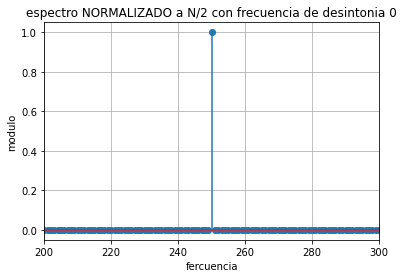

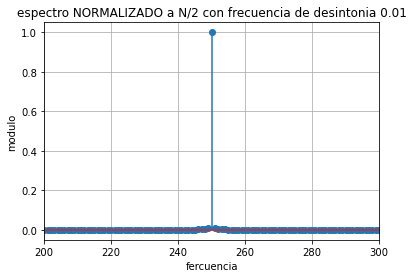

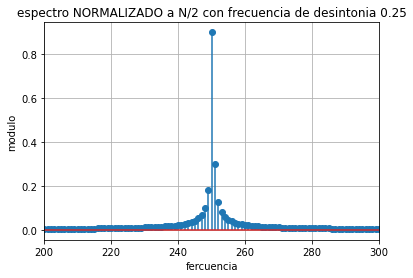

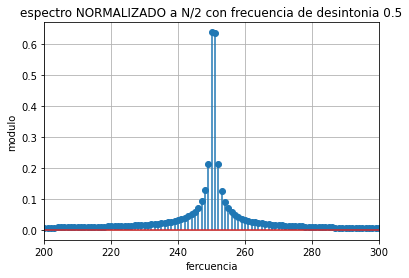

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,1,1.84088e-14,0
$f_S/4+0.01$,0.999804,0.0101307,0.000657926
$f_S/4+0.25$,0.900316,0.300108,0.378861
$f_S/4+0.5$,0.63762,0.63562,1.18688


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from pandas import DataFrame
from IPython.display import HTML

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    signal = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, signal   

##############################################################################

# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   [''                       , ''                          , '$F:f \neq f_0$'                       ] 
                 ]

#############################################################################
N  = 1000         
fs = 1000        
df=fs/N                   

a0 = 1 # Volts
p0 = np.pi/4  #radianes. 

fd = [0, 0.01, 0.25, 0.5]    # Aplicamos vriaciones de desintonia de la frecuencia de la señal para poder poner
                             # de manifiesto el efecto de DESPARRAMO ESPECTRAL

for i in range(len(fd)):

    f0 = fs/4  + fd[i]   

    tt , signal = generador_senoidal(fs , f0 , N , a0 , p0)

   
    fft1 = fft(signal)            # no hace falta pasar N
    
    #####################################################################
    #CRITERIO DE NORMALIZACION EN MI CALIBRACION CON SENAL SENOIDAL SIMPLE
    #####################################################################
    
    #Al calcular los valores absolutos debo normalizar por N para no perder escala.
    #Pero la fft a partir del bin(volor de K)=N/2 me toma valores espejo
    #Por lo q a partir de N/2 se repite el espectro representando a ambos con una 
    #escala de N/2 (VER SCRIP "NORMALIZACION Y ESPEJO CON FFT.PY")
    
    #####################################################################
    
    fft1 = fft(signal)            # Calcula FFT
    fftabs = np.abs(fft1)/(N-N/2) #Normalizacion
    fftangle = np.angle(fft1)
    freq = np.arange(0 , fs , fs/N)
    
    ##################################################################
    
    
    tus_resultados.append([ (fftabs[250]), (fftabs[251]) , ((np.sum(fftabs**2)) - (2*(fftabs[int( N/4)])**2))  ])
    
         
    plt.figure(i+1)
    # plt.plot (freq , fftabs , 'o-' )
    plt.stem( freq , fftabs, use_line_collection = True) 
    plt.xlim(200,300)
    plt.xlabel('fercuencia') 
    plt.ylabel('modulo')
    plt.title ('espectro NORMALIZADO a N/2 con frecuencia de desintonia '+str(fd[i])) #str conviente int en string
    plt.grid() #coloca grilla en graficos
    plt.show()
    
######################################################################################################



#######################################
# Tu simulación que genere resultados #
#######################################


    
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

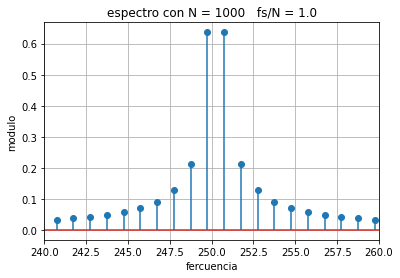

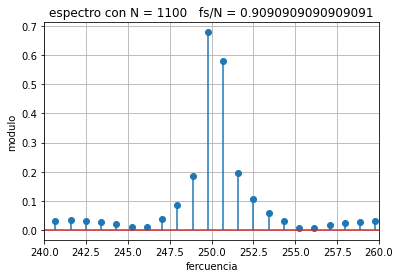

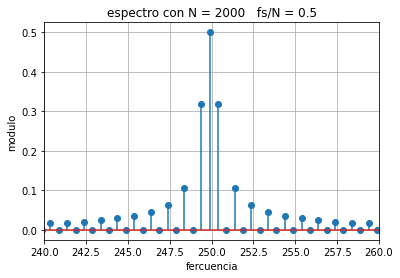

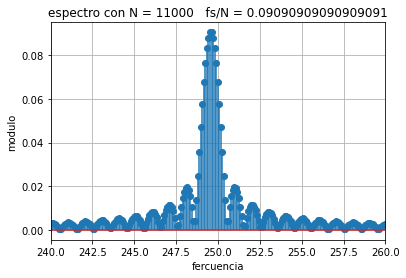

In [4]:
# Inserte aquí su código
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
from scipy.fftpack import fft, fftfreq

def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx

N  = 1000 # muestras
fs = 1000 # Hz
a0 = 1       # Volts
p0 = 0 # radianes
fd=0.5
mj = [0, int(N/10), N, 10*N]


for i in range(len(mj)):
    Norma = (N+mj[i])/2
    tt, xx = generador_senoidal( fs, fs/4+fd, N, a0, p0)
    x = np.concatenate((xx, np.zeros(mj[i]))) #CREO UN NUEVO VECTOR CON ZERO PADDING
    fft1 = fft(x)
    fftabs = np.abs(fft1)/Norma #NORMALIZO A N/2
    
    df = fs/(N+mj[i])  

    freq = np.linspace( start=-(N)/2, stop= (N)/2 ,num = N+mj[i] )
    plt.figure(i+1)
    plt.stem(  freq ,fftabs, use_line_collection = True)
    plt.xlim(240,260)
    plt.xlabel('fercuencia') 
    plt.ylabel('modulo')
    plt.title ('espectro con N = ' + str(N+mj[i]) + '   fs/N = ' + str(df)) #str conviente int en string
    plt.grid() #coloca grilla en graficos
    plt.show()
    

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La resolución espectral varia incrementando N. Obteniendo de esta manera una resolución espectral más fina. 
Por lo que tendré más puntos de muestreo.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con la técnica del Zero Padding puedo incrementar los puntos de muestreo viendo el espectro de mi señal convulsionado con una interpolante (Kernel de Dirichlet) con mayor resolución. Cuando relleno con gran cantidad de ceros Visualizo la forma de  Kernel de Dirchlet que es la manisfestacion plena de la existencia de LA VENTANA IMPLICITA producida por la necesidad de tener una limitación temporal. 
Es de remarcar que la separación de cada muestra es la resolución espectral que define el Zero Padding ya que df = fs/N. 
Mientras más fina la resolución (mayor cantidad de ceros en la técnica del Zero Padding) interpolo mayor número de muestras.

</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [6]:
#######################################
# Tu simulación que genere resultados #
#######################################
import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy.fftpack import fft


def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx

N  = 1000 # muestras
fs = 1000 # Hz
a0 = 1       # Volts
p0 = np.pi/4  # radianes
f=0.5
fo=  fs/4+f

mj = [0, int(N/10), N, 10*N]
tus_resultados = []
freq = []

for m in mj:
    tt, xx = generador_senoidal( fs, fs/4+f, N, a0 , p0)   
    x = np.concatenate((xx, np.zeros(m)))
    fft1 = fft(x)
    frqs =  np.linspace( start= 0, stop= fs ,num = N+m)
    idx = np.argmax(np.abs(fft1))
    freq.append(frqs[idx] )                   
    resultado = (frqs[idx]-fo)*100/fo
    tus_resultados.append(resultado)

#tus_resultados = (tus_resultados - tus_resultados[0]) * 100/tus_resultados[0]
d = {'freq': freq, '$e_\%$': tus_resultados}
df = DataFrame(data = d,
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())



    




,freq,$e_\%$
0,250.250250,-0.099700
$N/10$,251.137398,0.254450
$N$,250.625313,0.050025
$10N$,250.477316,-0.009055


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,9
,,,
simulación,1.0000000000000004,1.0000000000000004,9


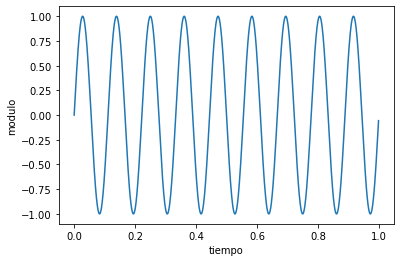

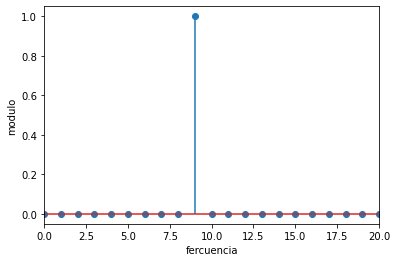

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from pandas import DataFrame
from IPython.display import HTML

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    signal = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, signal   

##############################################################################




tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1', '1', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]


#############################################################################
N  = 1000         
fs = 1000        
df=fs/N                   
a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 

f0 =9 * fs/N

Norma = N/2

tt , signal = generador_senoidal(fs , f0 , N , a0 , p0)
fft1 = fft(signal) 
fftabs = np.abs(fft1)/Norma               # Normalizo el espectro para q las amplitudes sean las esperadas en mi calibracion

#######################################################################################
#Normalizacion de Energias Con el objetivo de Calibrar mi herramienta de Visualizacion
# para que CUMPLA LA RELACION DE PARSERVAL 
#######################################################################################

energia_signal = np.sum(signal**2)/Norma  # El criterio de normalizacion utlizado con las Amplitudes espectrales (N/2) aplica
                                          # perfectamnete para los calculos de energia en el dominio tiempo que coincidan
                                          # con los esperados

energia_fftabs = np.sum(fftabs**2)/2      # Si mantengo el criterio de normalizar el valor abs de la fft (fftabs) por N/2
                                          # para mantener coherencia en Amplitudes, Divido por dos el calculo de la energia 
                                          # para cumplir con la Relacion de Parserval

#######################################################################################
        

plt.figure(1)
plt.plot(tt,signal)
plt.xlabel('tiempo') 
plt.ylabel('modulo')

plt.figure(2)
freq = np.arange(0 , fs , fs/N)
plt.stem( freq , fftabs, use_line_collection = True)
plt.xlim(0, 20)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')
                                     

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados.append([str(np.sum(fftabs**2)/2 ),str(fftabs[9]**2), str(np.argmax(fftabs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())




<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9 = 0.1,1/9 = 0.1,9
,,,
simulación,0.11111095025151768,0.013285662042849757,8


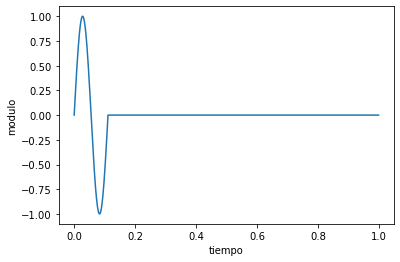

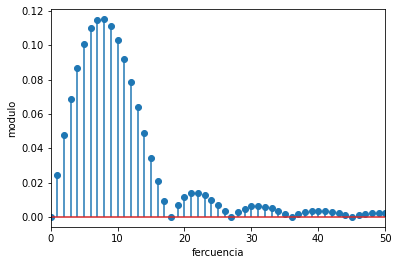

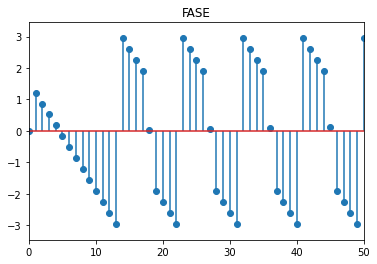

In [8]:
#######################################
# Tu simulación que genere resultados #
#######################################
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9 = 0.1', '1/9 = 0.1', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]


ciclos = 1

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(ciclos*fs/f0):] = 0  #  como si tomara un numero de muestras N=fs/f0 y aplico la tecnica Zero Padding llenando 
                            #  con ceros luego del primer ciclo
                            #  N = 1000

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
fftxx_ph = np.angle(fftxx)
freq = np.arange( 0 , fs , fs/N)



plt.figure(1)
plt.plot(tt , xx)
plt.xlabel('tiempo') 
plt.ylabel('modulo')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection = True)
plt.xlim(0, 50)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')

plt.figure(3)
plt.stem(freq , fftxx_ph , use_line_collection = True)
plt.xlim(0,50)
plt.title('FASE')



tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])

                 
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())




Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Al recortar la señal en un solo ciclo manteniendo N = 1000 la FFT reproduce la experiencia de Zero Padding convulsionando mi señal con dos Kernel como respuesta al buffer temporal (pulso cuadrado), uno de df = fs/N=1000/100 = 10 que es el que observamos en la figura y otro mas fino de df = 1000/1000 = 1 que me determina el espacio entre muestras.
En cuanto a las energías se nota coherencia al tener un ciclo 1/9 parte de la señal completa.

</div>


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/10 = 0.1,1/10 = 0.1,9
,,,
simulación,0.11111073979416734,0.01328298059631169,8


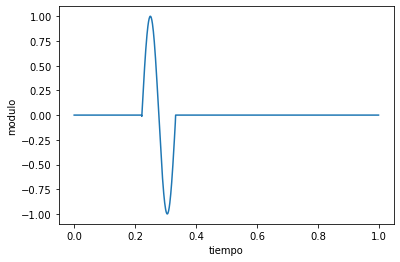

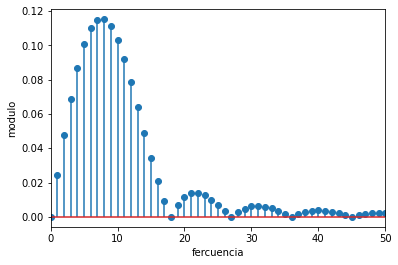

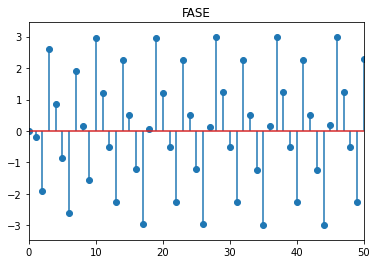

In [9]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/10 = 0.1', '1/10 = 0.1', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[:int(2*N/f0)] = 0                                #coloca ceros desde xx[0] a xx[2*N/fo]
xx[int(3*N/f0):] = 0                                #coloca ceros desde xx[3*N/fo] hasta el final del vector xx es decir xx[N]

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/(Norma)
fftxx_ph = np.angle(fftxx)
freq = np.arange( 0 , fs , fs/N)

plt.figure(1)
plt.plot(tt , xx)
plt.xlabel('tiempo') 
plt.ylabel('modulo')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection = True)
plt.xlim(0, 50)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')

plt.figure(3)
plt.stem(freq , fftxx_ph , use_line_collection = True)
plt.xlim(0,50)
plt.title('FASE')

tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Desplazo el pulso cuadrado que limita en tiempo, pero no vario su tamaño  por lo que la resolución espectral no varia. No modifico frecuencia ni amplitud.Por lo tanto Los espectros son los mismos. 
NOTEMOS EN CAMBIO QUE EL ESPECTRO DE FASE SI SUFRE VARIACIONES
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/8 = 0.236,1/9+1/8 = 0.236,9
,,,
simulación,0.2361109502515178,0.055988157778665774,8


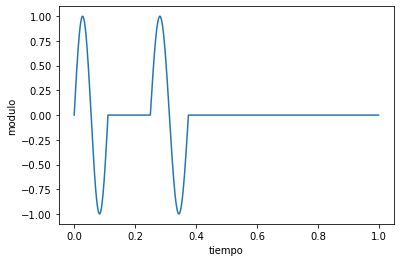

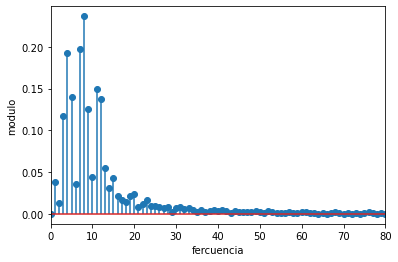

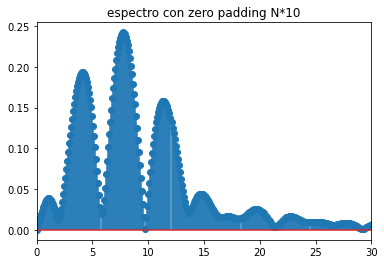

In [10]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/8 = 0.236', '1/9+1/8 = 0.236', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]


f0 =8 * fs/N
Norma = N/2

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[:int(2*N/f0)] = 0
xx[int(3*N/f0):] = 0

f02 =9 * fs/N

tt , xx2 = generador_senoidal(fs , f02 , N , a0 , p0)
xx2[int(1*N/f02):] = 0
xx += xx2
xx1 = np.concatenate((xx,np.zeros(N*10)))

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/(Norma)
freq = np.arange( 0 , fs , fs/N)

fftxx1 = fft(xx1)
fftxx1_abs = np.abs(fftxx1)/Norma

plt.figure(1)
plt.plot(tt , xx)
plt.xlabel('tiempo') 
plt.ylabel('modulo')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection = True)
plt.xlim(0, 80)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')

freqxx1 = np.fft.fftfreq(len(xx1),1/N)
plt.figure(3)
plt.stem(freqxx1 , fftxx1_abs , use_line_collection=True)
plt.xlim(0,30)
plt.title('espectro con zero padding N*10')


tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])





df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No puedo localizar con claridad las componentes. Aplico Zero Padding sin observar un patron por medio del cual poder identificar claramente las componentes de frecuencia de mi señal.
    Lo que puedo observar es una redistribucion de energias alrededor del tono de 8HZ
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/8 = 0.236,1/9+1/8 = 0.236,9
,,,
simulación,0.2361107397941674,0.04902895249150486,9


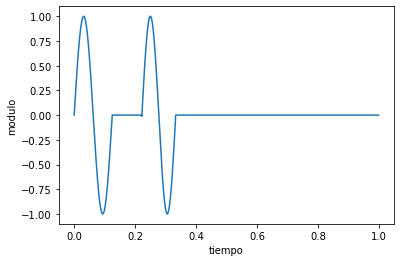

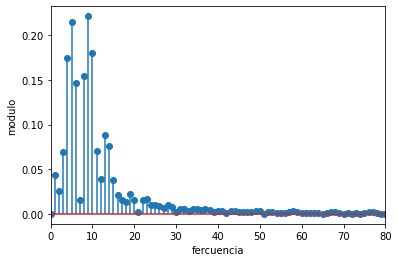

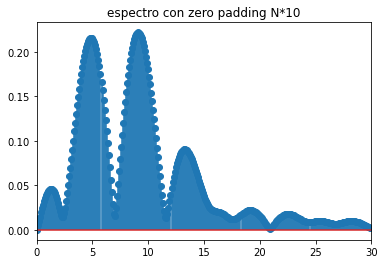

In [11]:
#######################################
# Tu simulación que genere resultados #
#######################################



tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/8 = 0.236', '1/9+1/8 = 0.236', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]

f0 =8 * fs/N
tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*N/f0):] = 0

f02 =9 * fs/N
tt , xx2 = generador_senoidal(fs , f02 , N , a0 , p0)
xx2[:int(2*N/f02)] = 0
xx2[int(3*N/f02):] = 0

xx += xx2
xx1 = np.concatenate((xx,np.zeros(N*10)))

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/(Norma)
freq = np.arange( 0 , fs , fs/N)

fftxx1 = fft(xx1)
fftxx1_abs = np.abs(fftxx1)/Norma

plt.figure(1)
plt.plot(tt , xx)
plt.xlabel('tiempo') 
plt.ylabel('modulo')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection = True)
plt.xlim(0, 80)
plt.xlabel('fercuencia') 
plt.ylabel('modulo')

freqxx1 = np.fft.fftfreq(len(xx1),1/N)
plt.figure(3)
plt.stem(freqxx1 , fftxx1_abs , use_line_collection=True)
plt.xlim(0,30)
plt.title('espectro con zero padding N*10')


tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Ha cambiado el espectro produciendo una redistribucion de energia ahora alrededor del tono de 9Hz, que este caso ocurre en segundo lugar.Remplazando en mi codigo por valores varios de f0 y f02 observo Que la fft distribuye la energia mas baja sin poder establecer en caso de que solo conozca el espectro cules osn las frecuencias exactas de los tonos
    
    *Solo con el espectro no puedo leer orden de ocurrencia en forma precisa.
    *La utilidad de la herramienta entendida como metodo de identificacion de parametros de mi señal de entrada en el caso de idntificar componentes frecuenciales de mi se♫al y orden de ocurrencia no es muy precisa
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,3/9 = 0.33,3/9 = 0.33,9
,,,
simulación,0.3333325438210756,0.11111058540128557,9


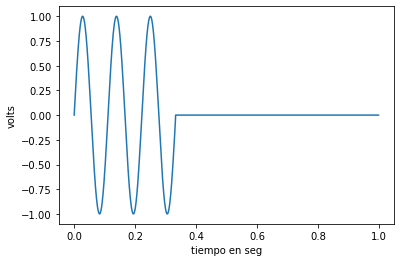

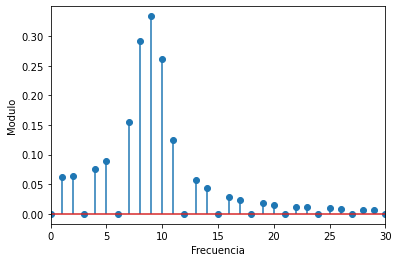

In [12]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['3/9 = 0.33', '3/9 = 0.33', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]
#############################################################################

N  = 1000         
fs = 1000        
df=fs/N                   

a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2
f0 =9 * fs/N

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(3*fs/f0):] = 0  #  como si tomara un numero de muestras N=fs/f0 y aplico la tecnica Zero Padding llenando 
                            #  con ceros luego del primer ciclo
                            #  N = 1000


fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
freq = np.fft.fftfreq(len(xx),1/N)


plt.figure(1)
plt.plot(tt , xx )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

energia_signal = np.sum(xx**2)/Norma
energia_fftabs = np.sum(fftxx_abs**2)/2 

tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b>EN COMPARCION TIENE EL 11% DE LA ENERGIA CON LOS 9 CICLOS PRESENTES. Y 8.5 VECES MAS QUE CON 1 CICLO.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+25/9+9/9 = 3.88,,9
,,,
simulación,3.8888789527837884,0.9999948831358995,9


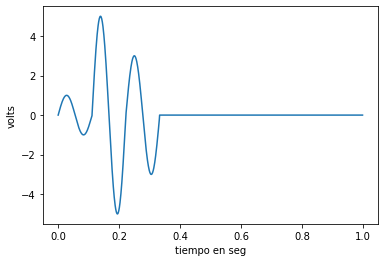

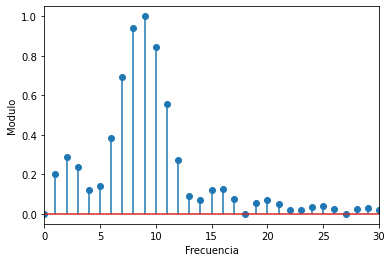

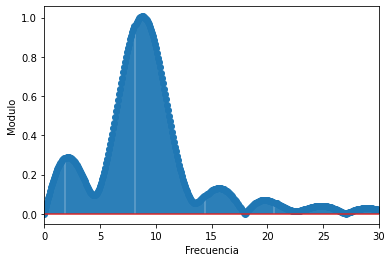

In [14]:
#######################################
# Tu simulación que genere resultados #
#######################################

##############################################################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+25/9+9/9 = 3.88', '', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]
#############################################################################

N  = 1000         
fs = 1000        
df=fs/N    
            
a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2
f0 =9 * fs/N

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*N/f0):] = 0    # los : al final me indican llenar de ceros 
                        #los valores del vector xx mayores a N/f0

tt , xx1 = generador_senoidal(fs , f0 , N , 5*a0 , p0)
xx1[:int(1*N/f0)] = 0
xx1[int(2*N/f0):] = 0

tt , xx2 = generador_senoidal(fs , f0 , N , 3*a0 , p0)
xx2[:int(2*N/f0)] = 0 # llena de ceros para las posiciones anterires del vector xx2 en 2*N/f0
xx2[int(3*N/f0):] = 0 # llena de ceros para las posiciones posterires del vector xx2 en 3*N/f0

xx += xx1
xx += xx2

xx3 = np.concatenate((xx,np.zeros(N*10)))  #APLICO ZERO PADDING

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
#freq = np.arange(0 , fs , 1/N)
freq = np.fft.fftfreq(len(xx),1/N)

fftxx3 = fft(xx3)                     #fft de señal con zero padding
fftxx3_abs = np.abs(fftxx3)/Norma
freq3 = np.fft.fftfreq(len(xx3),1/N)



plt.figure(1)
plt.plot(tt , xx )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

plt.figure(3)
plt.stem(freq3 , fftxx3_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

energia_signal = np.sum(xx**2)/Norma
energia_fftabs = np.sum(fftxx_abs**2)/2 

tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Tiene 9 veces mas energia. Tener en cuenta que  modifique Amplitudes.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,(1/9)*3+(100/9)*3+(9/9)*3 = 36.66,,9
,,,
simulación,36.66648778725389,21.777670914103673,9


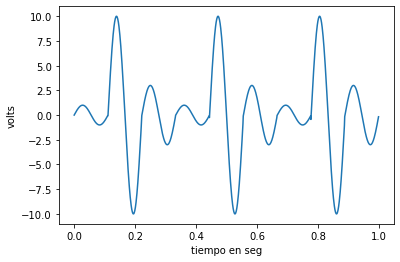

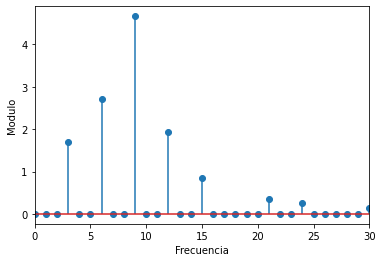

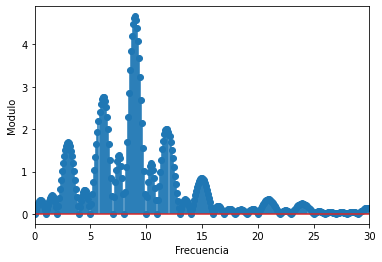

In [16]:
#######################################
# Tu simulación que genere resultados #

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['(1/9)*3+(100/9)*3+(9/9)*3 = 36.66', '', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]
#############################################################################

N  = 1000         
fs = 1000        
df=fs/N    
            
a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2
f0 =9 * fs/N

tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*N/f0):int(3*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx[int(4*N/f0):int(6*N/f0)] = 0
xx[int(7*N/f0):int(9*N/f0)] = 0

tt , xx2 = generador_senoidal(fs , f0 , N , 10*a0 , p0)
xx2[:int(1*N/f0)]=0
xx2[int(2*N/f0):int(4*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx2[int(5*N/f0):int(7*N/f0)] = 0
xx2[int(8*N/f0):] = 0

tt , xx1 = generador_senoidal(fs , f0 , N , 3*a0 , p0)
xx1[:int(2*N/f0)]=0
xx1[int(3*N/f0):int(5*N/f0)] = 0 #inserta ceros entre xx[N/f0] y xx[3*N/f0]
xx1[int(6*N/f0):int(8*N/f0)] = 0



xx += xx1
xx += xx2

xx3 = np.concatenate((xx,np.zeros(N*10)))  #APLICO ZERO PADDING

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
#freq = np.arange(0 , fs , 1/N)
freq = np.fft.fftfreq(len(xx),1/N)

fftxx3 = fft(xx3)
fftxx3_abs = np.abs(fftxx3)/Norma
freq3 = np.fft.fftfreq(len(xx3),1/N)

plt.figure(1)
plt.plot(tt , xx )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

plt.figure(3)
plt.stem(freq3 , fftxx3_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')


energia_signal = np.sum(xx**2)/Norma
energia_fftabs = np.sum(fftxx_abs**2)/2 

tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con respecto ciclo anterior tiene 21,8 veces mas energia. En 4g tenemos la convolucion de la señal por un pulso cuadrado limitado mas en tiempo ( mas chico) y logivamente un ciclo tiene menor energia que nueve, obteniendo una distribucion espectral con variacion en las amplitudes de energias distribuidas alredor de la fundamental de fo = 9Hz a lo largo de un Kernel mas ancho( al aplicar zero padding al espectro resultante se ve claramente). En el caso 4h el pulso cuadrado es mas ancho teniendo los tres ciclos completos, por lo que tengo mayor energia, con el Kernel asociado al pulso cuadrado en el dominio frecuencial mas angosto provocando que la energia en lineas generale se distribuya alrededor de 9hz en forma mas uniforme. Esto confirma la relacion de 21.8 veces ente energia(f0)_4h/energia(f0)_4g. Adjunto scrip de comparacion de espectros
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9+1/9 = 0.22,,9
,,,
simulación,0.2222218040269083,0.03935956953909179,5


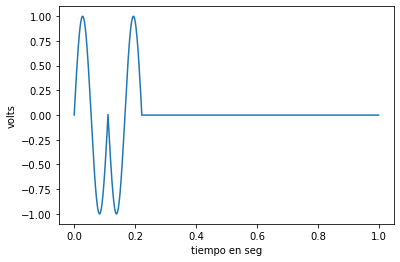

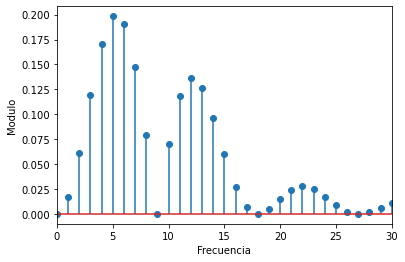

In [17]:
#######################################
# Tu simulación que genere resultados #
#######################################

##############################################################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['1/9+1/9 = 0.22', '', '9'], # <-- completar acá
                  ['', '', ''], 
                  #['', '', '']  # <-- completar acá
                 ]
#############################################################################

N  = 1000         
fs = 1000        
df=fs/N    
            
a0 = 1 # Volts
 
Norma = N/2
f0 =9 * fs/N


p0 = 0
tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*N/f0):] = 0



p0 = np.pi
tt , xx1 = generador_senoidal(fs , f0 , N , a0 , p0)
xx1[:int(1*N/f0)] = 0
xx1[int(2*N/f0):] = 0

xx += xx1

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
#freq = np.arange(0 , fs , 1/N)
freq = np.fft.fftfreq(len(xx),1/N)

plt.figure(1)
plt.plot(tt , xx )
plt.xlabel('tiempo en seg')
plt.ylabel('volts')

plt.figure(2)
plt.stem(freq , fftxx_abs , use_line_collection=True )
plt.xlim(0 , 30)
plt.xlabel('Frecuencia')
plt.ylabel('Modulo')

energia_signal = np.sum(xx**2)/Norma
energia_fftabs = np.sum(fftxx_abs**2)/2 

tus_resultados.append([str(np.sum(fftxx_abs**2)/2 ),str(fftxx_abs[np.argmax(fftxx_abs)]**2), str(np.argmax(fftxx_abs))])


df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Tiene tres veces mas energia.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> ♦Es una herramienta util para el calculo de energias de señal por el simple echo de cumplir la relacion de parserval 'PREVIA NORMALIZACION'!!!! ♦Al analizar el contenido espectral debo tener en cuenta la ventana implicita y la redistribucion de energias que provoca alrededor de la fundamnetal consecuencia del ventaneo ♦No es exacta para la determinacion  de la energia de determinado componente espectral precisamente por la convolucion con el kernel de dirichlet representacion del pulso cuadrado en el dominio de la frecuencia. ♦No puedo calcular con exactitud la ocurrencia de los tonos. ASI COMO ESTABLECIMOS CONDICIONES DE NORMALIZACION PARA EL CUMPLIMIENTO DE PARSERVAL, Y CONDICION EN LA RELACION DE LA FUNDAMNETAL fo CON RESPECTO A LA RESOLUCION ESPECTRAL PARA NO TENER DESPARRAMO ESPECTRAL, CREO NOS ESTARIAN FALTANDO HERRAMIENTAS DE ESTE ESTILO PARA INTERPRETAR MAS EXACTAMENTE LAS ENERGIAS DE LOS CONTENIDOS ESPECTRALES Y SU LOCALIZACION TEMPORAL 
</div>


<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,1.0138783166372292,0.34555555555555556,0.08062381729220128
8 bits,1.0138783166372292,0.34711480199923106,0.08099356537340098
16 bits,1.0138783166372292,0.34710157543900294,0.09028493837769867


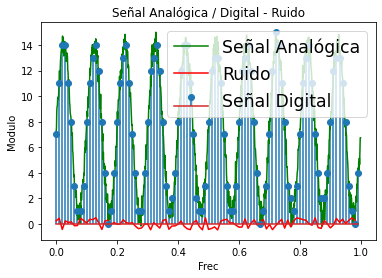

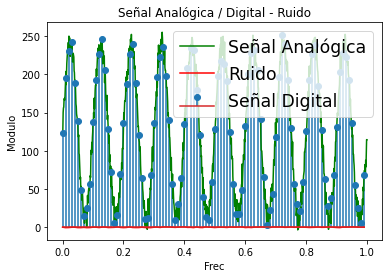

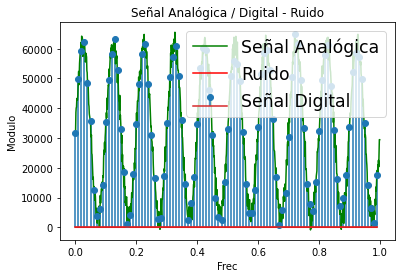

In [2]:
#######################################
# Tu simulación que genere resultados #
#######################################
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.fft import fft
from pandas import DataFrame
from IPython.display import HTML




##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    xx = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, xx   

##############################################################################
def ADC(xx,fs,s, bits):   
    Ts = int(fs/s)
    digital = (xx[::Ts])
    digital= np.rint(digital*(2**bits-1)) 
    i=0
    for sample in digital:
        if sample>2**bits-1:
            digital[i]= 2**bits-1 
        if sample<0:
            digital[i]=0
        else:
            digital[i] = sample
        i += 1    
    return np.array(digital)


N  = 1000 # muestras
fs = 1000 # Hz
a0 = np.sqrt(2)    # Volts
p0 = 0     # radianes

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 

                 ]

pot = []
e = []
e_list = []

tt, xx = generador_senoidal (fs=fs, f0=fs/100, N=N, a0=a0, p0=p0)
ruido = np.random.normal(0, 0.1, len(xx))

corr = np.correlate(ruido,ruido, mode='same')
potRuido = corr[int(N/2)]/len(corr)

xx += ruido
pot = np.mean(xx**2)

continua = 0.5

xx /= 2*np.max(xx)
xx += continua

bits = [4, 8, 16]

for bit in bits:
    
    digital = ADC(xx=xx,fs=fs,s=fs/10,bits=bit)
    
    e = (2**bit-1)*xx[::10] - digital
    e_list.append(e)
    
    fig.ax1 = plt.subplots()
    ax1.plot(tt,(2**bit-1)*xx,'g',label='Señal Analógica')
    ax1.plot(tt[::10],e,'r',label='Ruido')

    ax1.stem(tt[::10], digital,label='Señal Digital', use_line_collection = True)
    ax1.set_title('Señal Analógica / Digital - Ruido')
    ax1.set_ylabel('Modulo')
    ax1.set_xlabel('Frec')

    ax1.legend(loc='upper right', fontsize = 'xx-large')  # Add a legend.
  
    tus_resultados.append([str(pot), str(np.mean(digital**2)/(2**bit-1)**2), str(np.mean(e**2))])

df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

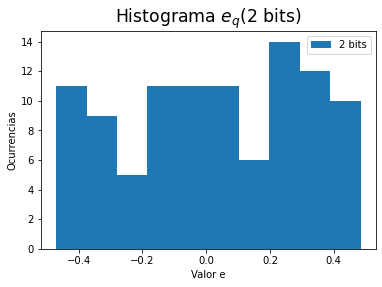

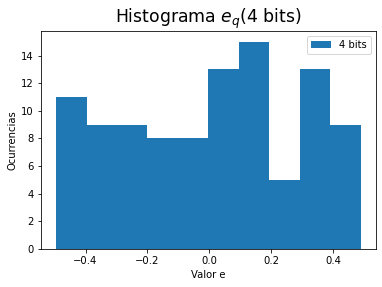

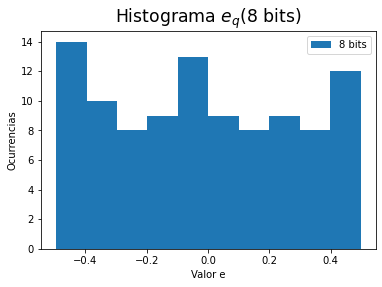

In [3]:
#####################################
# Tu simulación que genere gráficas #
#####################################
for i in np.arange(3):
    fig1, ax1 =  plt.subplots()
    plt.hist(e_list[i], bins=10, label='%i bits' %(2**(i+1))) 
    ax1.set_title('Histograma $e_q$(%i bits)' %(2**(i+1)), fontsize = 'xx-large')
    ax1.set_ylabel('Ocurrencias')
    ax1.set_xlabel('Valor e')
    ax1.legend(loc='upper right')


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Los histogramas  nos indican que no hay uniformidad en la probabilidad  del error de cuantizacion 'e'
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [4]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   #['', '', ''], # <-- completar acá
                   #['', '', ''], # <-- completar acá
                   #['', '', ''], # <-- completar acá
                 ]

for i in np.arange(3):
    tus_resultados.append([np.mean(e_list[i]), np.sqrt(np.mean(e_list[i]**2)), np.mean(e_list[i]**2)])

df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,0.030085,0.283943,0.080624
8 bits,0.001447,0.284594,0.080994
16 bits,-0.018123,0.300475,0.090285


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [5]:
#######################################
# Tu simulación que genere resultados #
#######################################
tus_resultados = [ 
                   #['', '', ''], # <-- completar acá
                   #['', '', ''], # <-- completar acá
                   #['', '', ''], # <-- completar acá
                 ]

for i in np.arange(3):
    tus_resultados.append([np.mean(e_list[i]), np.sqrt(np.std(e_list[i])), np.var(e_list[i])])

df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,0.030085,0.531361,0.079719
8 bits,0.001447,0.533470,0.080991
16 bits,-0.018123,0.547656,0.089957


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si el nro de bit de la palabra de cuantizacion aumenta, e = v/2**B error de cuantizacion baja y su varianza qu es una representacion de la energia q**2/12 baja. En el cuadro 5c vemos que la energia es cte cuando deberia bajar, en el cuadro 5d vemos que la varianza no baja a medida que se incrementa B. Tengo que revisar el codigo
</div>